In [22]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import sys
import urllib

import numpy as np

import astropy.units as u
from astropy import wcs
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.visualization import make_lupton_rgb
from astropy.utils.data import download_file, clear_download_cache

import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
from unagi import config
from unagi import hsc
from unagi import plotting
from unagi.task import hsc_cutout

## Comparing the coadd images in DR2 and DR3

- In HSC `DR2`, a global background model strategy was used to preserve the low surface brightness features around bright objects and to avoid strong over-subtraction patterns. However, this choice causes significant problems for the survey data analysis. It makes deblending around bright objects very challenging and also increases the area covered by bright stars by a lot.
- In the following rerun in `DR3`, such as the `S19A` and `S20A`, the global sky subtraction is not used in the default coadd image.
- **Note that**:
    - `S18A` in internal `DR2` should be identical with `PDR2`
    - `DR3` now is only available through internal data release.

In [24]:
# This is the coordinate of a massive galaxy at z~0.29
coord = SkyCoord(136.630340641700, -0.3601215050458714, frame='icrs', unit='deg')
s_ang = 30.0 * u.arcsec

### PDR2 Wide

In [25]:
pdr2 = hsc.Hsc(dr='pdr2', rerun='pdr2_wide') 

# Get table list from /Users/song/Dropbox/work/project/unagi/unagi/data/pdr2_wide/pdr2_wide_tables.fits


# Retrieving cutout image in filter: i


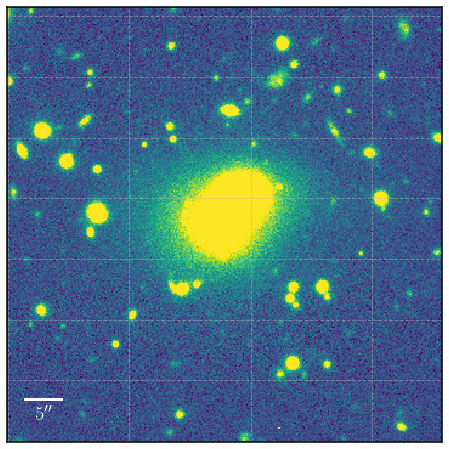

In [27]:
cutout_pdr2 = hsc_cutout(coord, cutout_size=s_ang, filters='i', archive=pdr2, 
                         use_saved=False, verbose=True, save_output=False)

img_pdr2 = cutout_pdr2[1].data
_ = plotting.display_single(img_pdr2)

cutout_pdr2.close()

### S18A Wide

* Now you will get a warning when using `DR2` since newer data release is available

/Users/song/Dropbox/work/project/unagi/unagi/config.py:816: UserWarning: # DR3 has become available now!
  warnings.warn("# DR3 has become available now!")


# Get table list from /Users/song/Dropbox/work/project/unagi/unagi/data/s18a_wide/s18a_wide_tables.fits
# Retrieving cutout image in filter: i


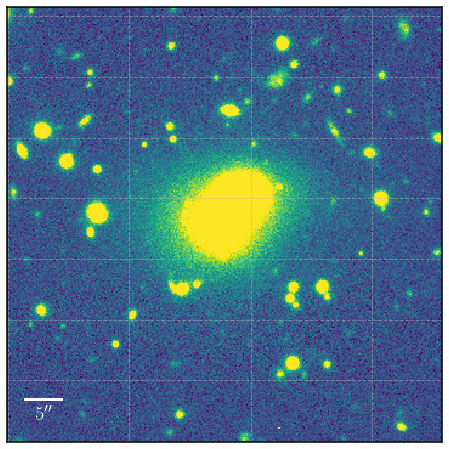

In [28]:
s18a = hsc.Hsc(dr='dr2', rerun='s18a_wide')

cutout_s18a = hsc_cutout(coord, cutout_size=s_ang, filters='i', archive=s18a, 
                         use_saved=False, verbose=True, save_output=False)

img_s18a = cutout_s18a[1].data
_ = plotting.display_single(img_s18a)

cutout_s18a.close()

### S19A Wide

# Get table list from /Users/song/Dropbox/work/project/unagi/unagi/data/s19a_wide/s19a_wide_tables.fits
# Retrieving cutout image in filter: i


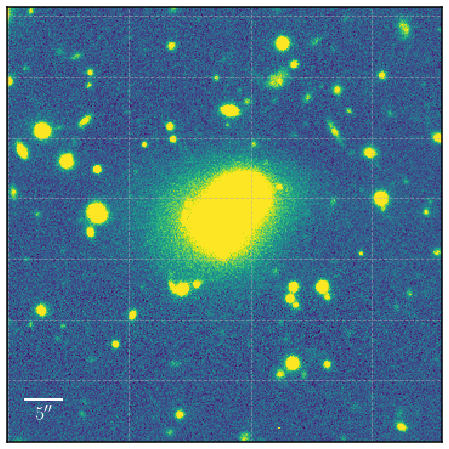

In [30]:
s19a = hsc.Hsc(dr='dr3', rerun='s19a_wide')

cutout_s19a = hsc_cutout(coord, cutout_size=s_ang, filters='i', archive=s19a, 
                         use_saved=False, verbose=True, save_output=False)

img_s19a = cutout_s19a[1].data
_ = plotting.display_single(img_s19a)

cutout_s19a.close()

### S20A Wide

# Get table list from /Users/song/Dropbox/work/project/unagi/unagi/data/s20a_wide/s20a_wide_tables.fits
# Retrieving cutout image in filter: i


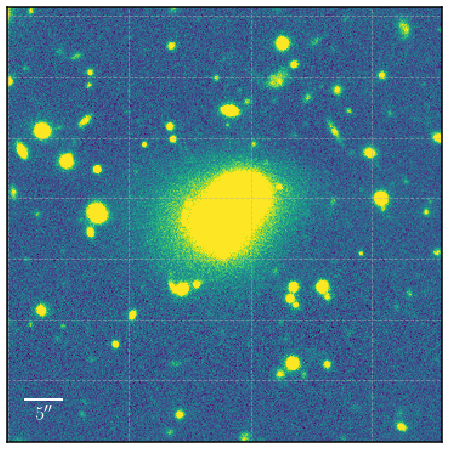

In [31]:
s20a = hsc.Hsc(dr='dr3', rerun='s20a_wide')

cutout_s20a = hsc_cutout(coord, cutout_size=s_ang, filters='i', archive=s20a, 
                         use_saved=False, verbose=True, save_output=False)

img_s20a = cutout_s20a[1].data
_ = plotting.display_single(img_s20a)

cutout_s20a.close()

### Visualize the differences

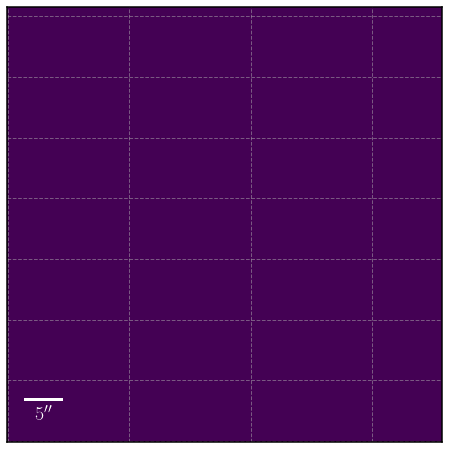

In [34]:
# S18A wide and PDR2 should be identical

_ = plotting.display_single(img_s18a - img_pdr2)

- Between S19A and S18A or PDR2, there are differences related to:
    1. Difference in astrometric calibration (in `DR3` we switch to PanSTARRS-1 star catalog that has been calibrated against Gaia DR2 astrometry)
    2. Difference in local background around bright object

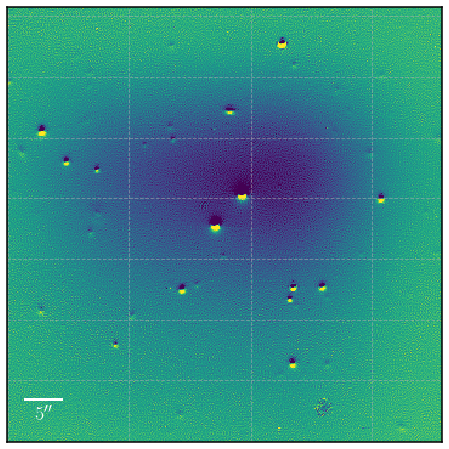

In [36]:
_ = plotting.display_single(img_s19a - img_s18a)

- `S20A` has the same issue 
    - The difference between `S20A` and `S19A` is caused by new exposures added to the coadd

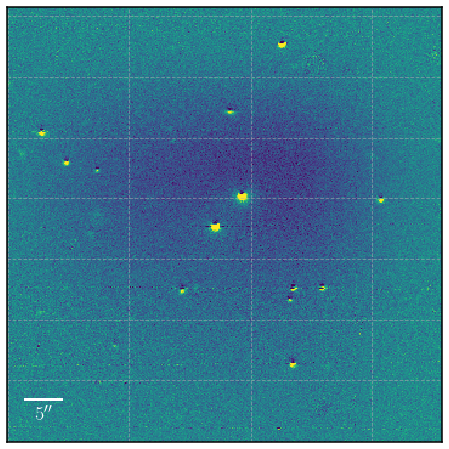

In [37]:
_ = plotting.display_single(img_s20a - img_s18a)

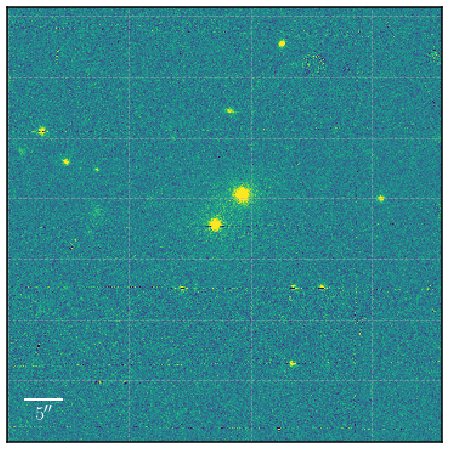

In [38]:
_ = plotting.display_single(img_s20a - img_s19a)